<a href="https://colab.research.google.com/github/shubhkhatwase/METAVERSE/blob/main/Onlineshopping_on_mantra3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")
from textblob import TextBlob
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

# importing the naceassary libraries

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [ ]:
data = pd.read_csv('/content/myntra_products_catalog.csv')
data

,ProductID,ProductName,ProductBrand,Gender,Price (INR),NumImages,Description,PrimaryColor
0,10017413,DKNY Unisex Black & Grey Printed Medium Trolle...,DKNY,Unisex,11745,7,"Black and grey printed medium trolley bag, sec...",Black
1,10016283,EthnoVogue Women Beige & Grey Made to Measure ...,EthnoVogue,Women,5810,7,Beige & Grey made to measure kurta with churid...,Beige
2,10009781,SPYKAR Women Pink Alexa Super Skinny Fit High-...,SPYKAR,Women,899,7,Pink coloured wash 5-pocket high-rise cropped ...,Pink
3,10015921,Raymond Men Blue Self-Design Single-Breasted B...,Raymond,Men,5599,5,Blue self-design bandhgala suitBlue self-desig...,Blue
4,10017833,Parx Men Brown & Off-White Slim Fit Printed Ca...,Parx,Men,759,5,"Brown and off-white printed casual shirt, has ...",White
...,...,...,...,...,...,...,...,...
12486,10262843,Pepe Jeans Men Black Hammock Slim Fit Low-Rise...,Pepe Jeans,Men,1299,7,"Black dark wash 5-pocket low-rise jeans, clean...",Black
12487,10261721,Mochi Women Gold-Toned Solid Heels,Mochi,Women,1990,5,"A pair of gold-toned open toe heels, has regul...",Gold
12488,10261607,612 league Girls Navy Blue & White Printed Reg...,612 league,Girls,602,4,Navy Blue and White printed mid-rise denim sho...,Blue
12489,10266621,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,Bvlgari,Men,8950,2,Bvlgari Men Aqva Pour Homme Marine Eau de Toil...,NaN


In [ ]:
# information about the data
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12491 entries, 0 to 12490
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   ProductID     12491 non-null  int64 
 1   ProductName   12491 non-null  object
 2   ProductBrand  12491 non-null  object
 3   Gender        12491 non-null  object
 4   Price (INR)   12491 non-null  int64 
 5   NumImages     12491 non-null  int64 
 6   Description   12491 non-null  object
 7   PrimaryColor  11597 non-null  object
dtypes: int64(3), object(5)
memory usage: 780.8+ KB


In [ ]:
# datatypes of the data
data.dtypes

ProductID        int64
ProductName     object
ProductBrand    object
Gender          object
Price (INR)      int64
NumImages        int64
Description     object
PrimaryColor    object
dtype: object

In [ ]:
# number of null values in each column
data.isnull().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

In [ ]:
# basic statistical information
data.describe()

,ProductID,Price (INR),NumImages
count,1.249100e+04,12491.000000,12491.000000
mean,9.917160e+06,1452.660956,4.913698
std,1.438006e+06,2118.503976,1.092333
min,1.012060e+05,90.000000,1.000000
25%,1.006215e+07,649.000000,5.000000
50%,1.015463e+07,920.000000,5.000000
75%,1.021565e+07,1499.000000,5.000000
max,1.027514e+07,63090.000000,10.000000


In [ ]:
data["ProductName"].value_counts()

Parx Men Blue Slim Fit Checked Casual Shirt                                          16
ZHEIA Women Blue Skinny Fit Mid-Rise Clean Look Stretchable Jeans                    15
Roadster Men Blue Skinny Fit Mid-Rise Clean Look Stretchable Jeans                   14
Sonari Pack of 2 Full-Coverage Bras                                                  14
Roadster Men Blue Slim Fit Mid-Rise Clean Look Stretchable Jeans                     13
                                                                                     ..
HRX by Hrithik Roshan Ultralyte Men Navy Blue Solid Running T-shirt                   1
Flying Machine Men Blue Michael Tapered Fit Mid-Rise Clean Look Stretchable Jeans     1
FAUSTO Men Red Slip-On Sneakers                                                       1
Indian Terrain Boys Rust Brown Printed Round Neck T-shirt                             1
Pepe Jeans Men Black & Grey Striped Polo Collar T-shirt                               1
Name: ProductName, Length: 10761

In [ ]:
# filling the null values
data["ProductName"]=data["ProductName"].fillna("General")

In [ ]:
data.isnull().sum()

ProductID         0
ProductName       0
ProductBrand      0
Gender            0
Price (INR)       0
NumImages         0
Description       0
PrimaryColor    894
dtype: int64

In [ ]:
data["PrimaryColor"].value_counts()

Blue         3443
 Black       1640
 Red         1543
 Green        908
 White        880
 Grey         684
 Brown        473
 Yellow       406
 Pink         391
 Gold         236
 Beige        236
 Maroon       187
 Orange       130
 Silver       111
 Purple        65
 Burgundy      64
 Khaki         56
 Navy          54
 Lavender      19
 Matte         17
 Mustard       15
 Magenta       13
 Charcoal      10
 Rose           8
 Platinum       3
 Bronze         3
 Peach          2
Name: PrimaryColor, dtype: int64

In [ ]:
# Filling the null values
data["PrimaryColor"] = data["PrimaryColor"].fillna("Blue")

In [ ]:
data.isnull().sum()

ProductID       0
ProductName     0
ProductBrand    0
Gender          0
Price (INR)     0
NumImages       0
Description     0
PrimaryColor    0
dtype: int64

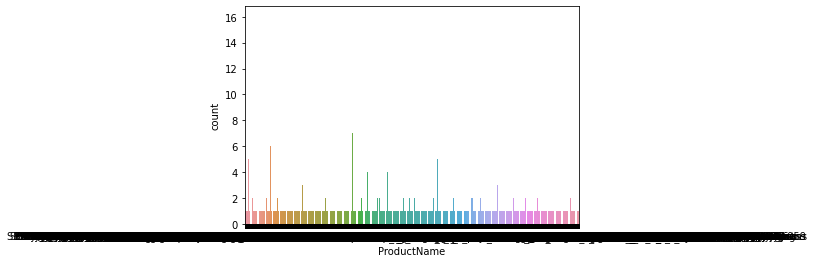

In [ ]:
# visulaisation of plot in each catgeory
sns.countplot(x = data["ProductName"],data = data)

In [ ]:
# column of each data
data.columns

Index(['ProductID', 'ProductName', 'ProductBrand', 'Gender', 'Price (INR)',
       'NumImages', 'Description', 'PrimaryColor'],
      dtype='object')

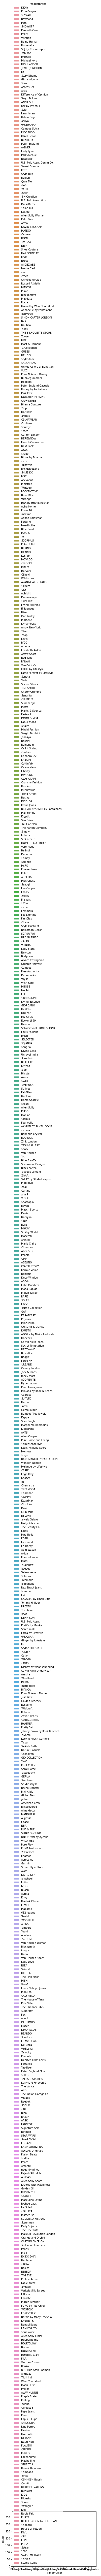

In [ ]:
# recomanded in each category 
sns.countplot(x =data["PrimaryColor"],data = data,hue = data['ProductBrand'])